In [1]:
from Gemini.GeminiPredict import GeminiPredict
from Generation.Equation_BaseDataset import Equation, BaseDataset
from Postprocessing.SOE_EquationGraph import SystemOfEquations, EquationGraph
from Scraping.Scraper import Scraper

import os
import google.generativeai as genai
from sympy import *
import pandas as pd

c:\Users\kyanj\anaconda3\envs\fyp_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Main

In [3]:
def main():
    # 1. Scraping journal data
    doi = "10.1016/j.jmatprotec.2017.04.005"
    elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
    scraper = Scraper(doi, elsevier_api_key)
    mathml_dict, const_dict = scraper.scrape()

    print(mathml_dict, const_dict)

    # 2. Equation translation
    gemini_api_key = os.getenv("GEMINI_API_KEY")
    model_name = "tunedModels/mmltopython4-f3fuppiemnq9"
    gp = GeminiPredict(gemini_api_key, model_name)
    mathml_equations = list(mathml_dict.values())
    equations = gp.generate_predictions(mml_list=mathml_equations)

    print(equations)

    # 3. Solving system of equations
    # p20_df = pd.read_csv("Data/p20.csv")
    # P_list = pd.to_numeric(p20_df['P']).tolist()
    # h_list_ref = pd.to_numeric(p20_df['h']).tolist()
    # soe = SystemOfEquations(equations)
    # for equation in soe.str_equations: # Improve this
    #     soe.parse_equation(equation)
    # symbs = soe.reduce_symbols(const_dict)
    # print(symbs)
    
    


main()

Request successful 

{1: <mml:mrow>
<mml:mi>h</mml:mi>
<mml:mo>=</mml:mo>
<mml:msub>
<mml:mi>h</mml:mi>
<mml:mi>g</mml:mi>
</mml:msub>
<mml:mo>+</mml:mo>
<mml:msub>
<mml:mi>h</mml:mi>
<mml:mi>c</mml:mi>
</mml:msub>
</mml:mrow>, 2: <mml:mrow>
<mml:mi>h</mml:mi>
<mml:mo>=</mml:mo>
<mml:mn>1.45</mml:mn>
<mml:mi>k</mml:mi>
<mml:mfrac>
<mml:mrow>
<mml:mi>tan</mml:mi>
<mml:mi>θ</mml:mi>
</mml:mrow>
<mml:mi>σ</mml:mi>
</mml:mfrac>
<mml:msup>
<mml:mrow>
<mml:mo stretchy="false">(</mml:mo>
<mml:mfrac>
<mml:mi>p</mml:mi>
<mml:mi>H</mml:mi>
</mml:mfrac>
<mml:mo stretchy="false">)</mml:mo>
</mml:mrow>
<mml:mrow>
<mml:mn>0.985</mml:mn>
</mml:mrow>
</mml:msup>
</mml:mrow>, 3: <mml:mrow>
<mml:mi>h</mml:mi>
<mml:mo>=</mml:mo>
<mml:mn>8000</mml:mn>
<mml:mstyle displaystyle="true">
<mml:mover accent="true">
<mml:mi>λ</mml:mi>
<mml:mo stretchy="true">¯</mml:mo>
</mml:mover>
</mml:mstyle>
<mml:msup>
<mml:mrow>
<mml:mo stretchy="false">(</mml:mo>
<mml:mfrac>
<mml:mi>p</mml:mi>
<mml:mrow>
<mml:mi>C</mml:mi>

Generating Predictions: 100%|██████████| 13/13 [00:12<00:00,  1.06row/s]

["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_

### Scraping

In [3]:
doi = "10.1016/j.jmatprotec.2017.04.005"
elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
scraper = Scraper(doi, elsevier_api_key)
mathml_dict, const_dict = scraper.scrape()

Request successful 



### Gemini

In [2]:
api_key = os.getenv("GEMINI_API_KEY")
gp = GeminiPredict(api_key, "Data/HTC_equations.txt", "tunedModels/mmltopython4-f3fuppiemnq9")
gp.predict_from_txt()
gp.save_predictions("Data/HTC_gemini_predictions.txt")

API key loaded successfully!


Generating Predictions: 100%|██████████| 13/13 [00:19<00:00,  1.46s/row]


In [3]:
gp.save_predictions()
# for model in genai.list_tuned_models():
#     print(model.name)

### Generation

In [4]:
eq = Equation()
py, mml = eq.generate()
print(repr(py))


"I = Symbol('I')\nx = Symbol('x')\ny_τ = Symbol('y_τ')\nΣ = Symbol('Σ')\nB = Symbol('B')\ne = Eq(I, -exp(Σ/4)**(sqrt(y_τ**x)) + tan(B))"


In [3]:
import csv
class GeminiDataset(BaseDataset):
    def __init__(self, num, filepath):
        super().__init__(num, filepath)

    def get_columns(self):
        return ["text_input", "output"]
    
gd = GeminiDataset(5, "Data/gemini_test_6.csv")
gd.create()


Generating dataset: 100%|██████████| 5/5 [00:00<00:00, 84.53it/s]

Τ = Symbol('Τ')
ζ = Symbol('ζ')
l_Π = Symbol('l_Π')
δ_a = Symbol('δ_a')
e = Eq(Τ, sqrt(ζ) + cos(l_Π - δ_a))
Ψ = Symbol('Ψ')
α = Symbol('α')
Ψ_xqχ = Symbol('Ψ_xqχ')
e = Eq(Ψ, sqrt(α) - cos(Ψ_xqχ) + 7)
Μ = Symbol('Μ')
H = Symbol('H')
m_Ψ = Symbol('m_Ψ')
Z = Symbol('Z')
b = Symbol('b')
e = Eq(Μ, sqrt(-H + m_Ψ)*exp(b)**Z)
Ξ_c = Symbol('Ξ_c')
Υ = Symbol('Υ')
Σ_ο = Symbol('Σ_ο')
e = Eq(Ξ_c, -exp(Υ) + cos(Σ_ο))
A_σm = Symbol('A_σm')
Θ = Symbol('Θ')
χ_Χμ = Symbol('χ_Χμ')
G_μ = Symbol('G_μ')
φ = Symbol('φ')
e = Eq(A_σm, G_μ**(sin(Θ + χ_Χμ)/2)/log(φ))


### Postprocessing

In [6]:
soe = SystemOfEquations(filepath="Data/HTC_gemini5_predictions.txt")
for eq in soe.str_equations:
    soe.parse_equation(eq)
symbs = soe.reduce_symbols(const_dict)
print(soe.symbols)
print(symbs)

{'h', 'h_l', 'k_w', 'k_s', 'σ', 'Rs', 'h_a', 'γ', 'k_t', 'h_g', 'h_f', 'θ', 'α', 'β', 'p', 'N_L', 'K', 'P', 'R', 'K_stl', 'K_st', 'Rt', 'C', 'k_l', 'h_c', 'k', 'σ_U', 'δ', 'A', 'B', 'H', 'N_P', 'k_f', 'λ'}
['h_a', 'R_t', 'α', 'k_l', 'β', 'k_t', 'k_t', 'k_s', 'k_t', 'R_s', 'R_t', 'γ', 'σ_U', 'λ', 'R_t']


Generating Curve: 100%|██████████| 101/101 [00:18<00:00,  5.34it/s]


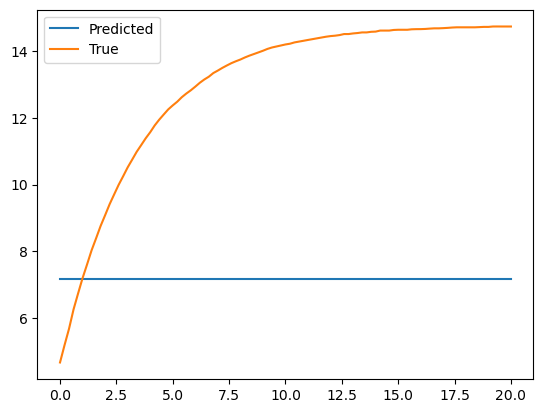

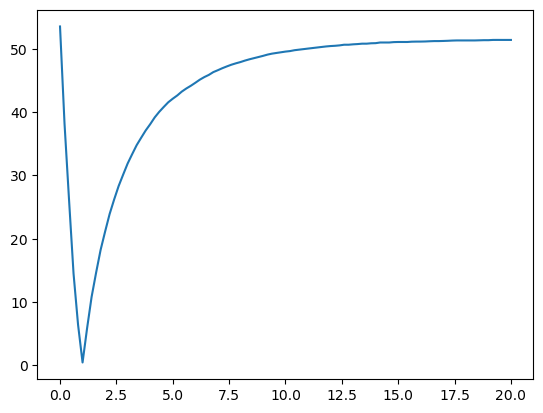

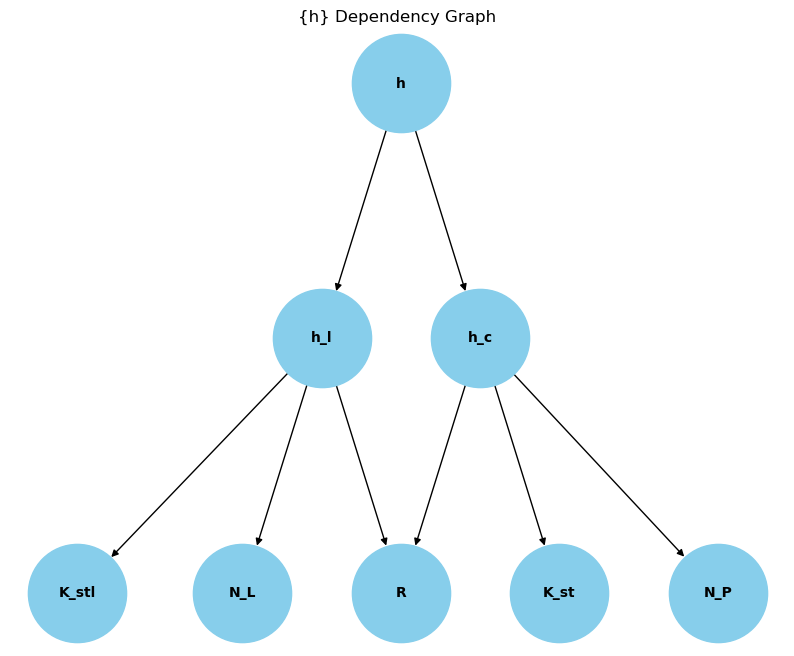

In [2]:
# Constants
k_s = 0.14
k_t = 0.0315
k_l = 0.024
Rs = 3.4e-07
Rt = 9.6e-07
h_a = 0.8
σ_U = 21.0
α = 0.000201
λ = 6.05
β = 0.00011
γ = 200000.0
δ = 1.5e-5
P = 1

k = 1
p = 1
H = 1
θ = 1
σ = 1
K = 1
C = 1
A = 1
B = 1
k_f = 1
k_w = 1
h_f = 1
h_g = 1

# Variables
h = Symbol("h")
h_c = Symbol("h_c")
K_st = Symbol("K_st")
R = Symbol("R")
N_P = Symbol("N_P")
h_l = Symbol("h_l")
K_stl = Symbol("K_stl")
N_L = Symbol("N_L")

exprs = [Eq(h, h_c + h_g), 
            Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ), 
            Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86), 
            Eq(h, A*(1 - exp(-B*P))), 
            Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w))), 
            Eq(h, h_a + h_c + h_l), 
            Eq(h_c, K_st*N_P*α/R), 
            Eq(K_st, 2/(1/k_t + 1/k_s)), 
            Eq(R, sqrt(Rs**2 + Rt**2)), 
            Eq(N_P, 1 - exp(-P*λ/σ_U)), 
            Eq(h_l, K_stl*N_L*β/R), 
            Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l)), 
            Eq(N_L, 1 - exp(-γ*δ))]

column_name = ["P", "h"]
p20_df = pd.read_csv("Data/p20.csv", header=None, names=column_name)
P_list = pd.to_numeric(p20_df["P"]).tolist()
h_list_ref = pd.to_numeric(p20_df["h"]).tolist()
soe = SystemOfEquations(filepath="Data/HTC_gemini5_predictions.txt")
# for eq in soe.str_equations:
#     soe.parse_equation(eq)
# system = soe.reduce_system(6)
# print(system)
eg = EquationGraph(exprs, 6)
system = eg.get_system_of_equations()
solutions = soe.solve_system(system, P_list, h)
soe.plot_graph(P_list, solutions, h_list_ref)
soe.plot_error_graph(P_list, solutions, h_list_ref)
eg.plot_graph()